In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap


1.Load the DataSet


In [10]:
df=pd.read_csv("E:\\projects\\ML\\elevate lab\\task7\\breast-cancer.csv")
print(df.head())
# df.replace('?', np.nan, inplace=True)

#prepare x and y
X = df.drop(['id', 'diagnosis'], axis=1)
y = pd.Categorical(df['diagnosis']).codes   # M=1, B=0

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

3.Split the data into train and test sets
 --Feature scaling

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4.Model-Linear SVM

In [12]:
svm_linear=SVC(kernel='linear') #, C=1.0, random_state=42
svm_linear.fit(X_train_scaled, y_train)

y_pred_lin = svm_linear.predict(X_test_scaled)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_lin))
print(classification_report(y_test, y_pred_lin))

Linear SVM Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



5.RBF SVM (NON-Linear SVM)

In [13]:
svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))
# Hyperparameter tuning for RBF SVM

RBF SVM Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



6. Hyperparameter tuning

In [14]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
best_svm = grid.best_estimator_

y_pred_best = best_svm.predict(X_test_scaled)
print("Best SVM Test Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Test Accuracy: 0.9736842105263158


7. Decision Boundary Visualization (Using 2 Features)

In [15]:
X2 = df[['radius_mean', 'texture_mean']]
y2 = pd.Categorical(df['diagnosis']).codes

X2_scaled = scaler.fit_transform(X2)

# Train SVM
svm2 = SVC(kernel='rbf', gamma=0.1, C=1)
svm2.fit(X2_scaled, y2)

# Create meshgrid
h = 0.02
x_min, x_max = X2_scaled[:, 0].min() - 1, X2_scaled[:, 0].max() + 1
y_min, y_max = X2_scaled[:, 1].min() - 1, X2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



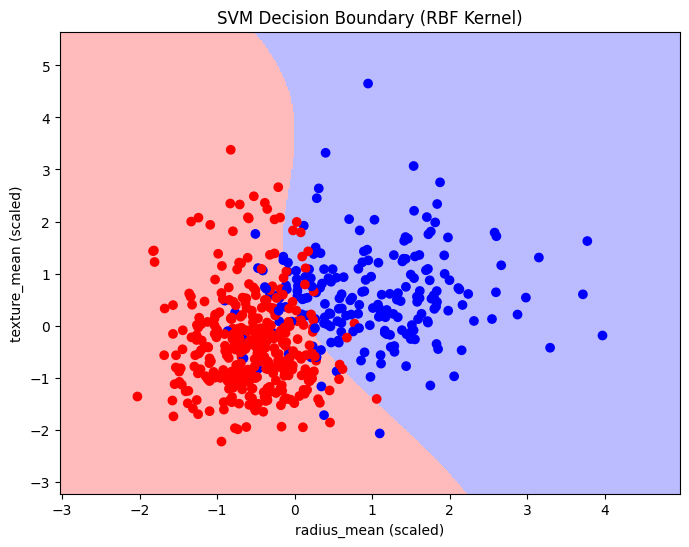

In [16]:
plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFBBBB', '#BBBBFF'])
cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y2, cmap=cmap_bold)

plt.xlabel("radius_mean (scaled)")
plt.ylabel("texture_mean (scaled)")
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.show()
